# 주성분 분석

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/6-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## PCA 클래스

In [30]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-05-19 13:17:01--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-05-19 13:17:01--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-05-19 13:17:01--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [31]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50) # 주성분을 50개로
pca.fit(fruits_2d)

PCA(n_components=50)

In [33]:
print(pca.components_.shape)

(50, 10000)


In [34]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

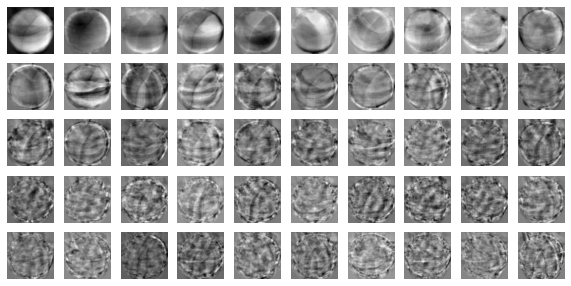

In [35]:
draw_fruits(pca.components_.reshape(-1, 100, 100)) # 주성분(또는 어떤 특성을 잡아낸 것)

In [36]:
print(fruits_2d.shape)

(300, 10000)


In [37]:
fruits_pca = pca.transform(fruits_2d)

In [38]:
print(fruits_pca.shape) # 특성이 50개로 줄음

(300, 50)


## 원본 데이터 재구성

In [39]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [40]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

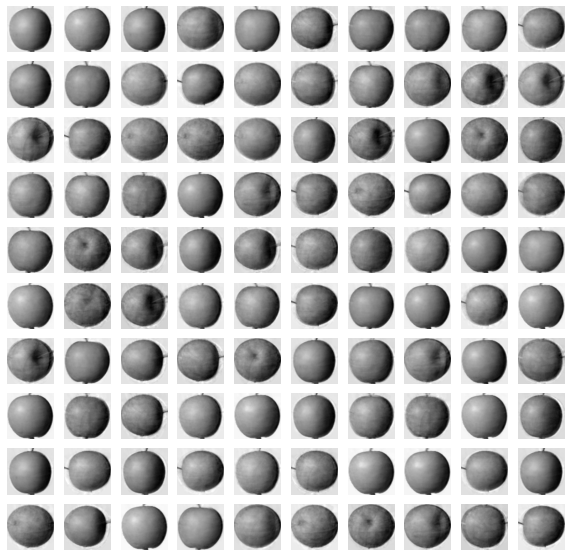

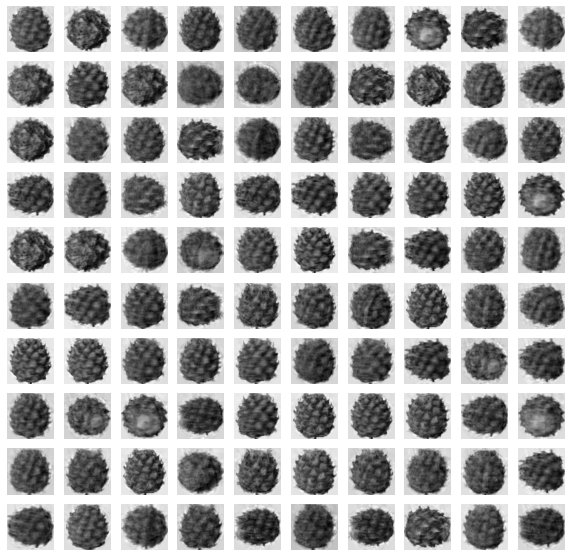

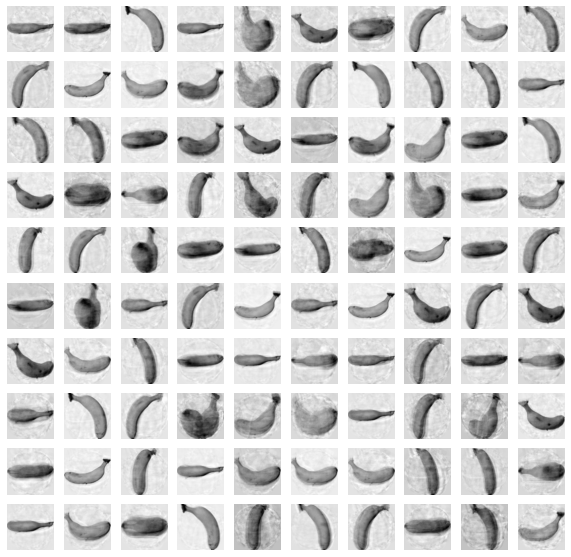

In [41]:
for start in [0, 100, 200]: # 100개씩 그림
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## 설명된 분산

In [42]:
print(np.sum(pca.explained_variance_ratio_)) # 각 주성분으로 설명할 수 있는 분산들의 합

0.921572977651729


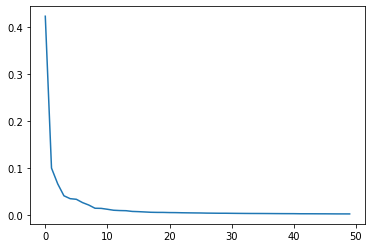

In [43]:
plt.plot(pca.explained_variance_ratio_) # 10번째 주성분 이후로는 큰 의미가 없음

## 다른 알고리즘과 함께 사용하기

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [45]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [46]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.9695783138275147


In [47]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.05859050750732422


In [48]:
pca = PCA(n_components=0.5) # 주성분분석의 분산의 합이 0.5가 될 때까지
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [49]:
print(pca.n_components_)

2


In [50]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [51]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.04620580673217774


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [52]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [53]:
print(np.unique(km.labels_, return_counts=True)) # 6-2에서 k-means을 사용했던 결과와 거의 비슷

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


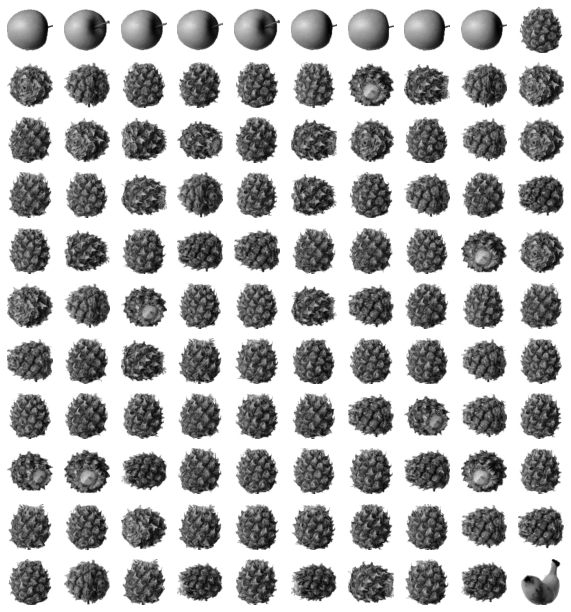

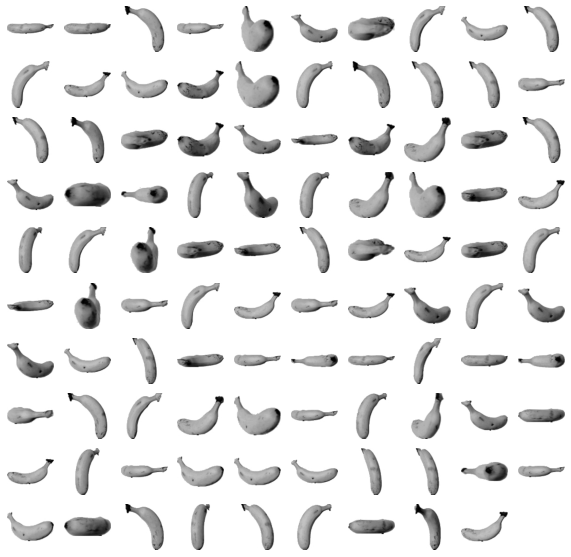

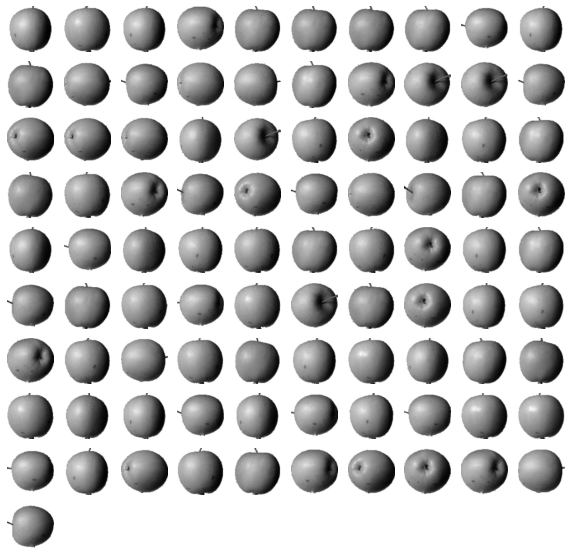

In [54]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

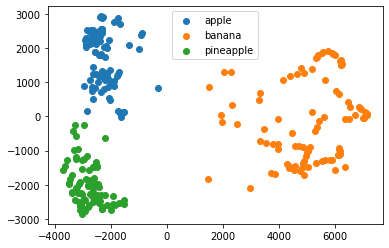

In [55]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

자료를 2차원 이내로 줄이면 이처럼 시각화할 수 있음 / pineapple과 apple의 결정 경계가 가깝다는 것을 확인할 수 있음